In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\rajar\Downloads\charging_station.csv")
print(df)
df.shape
df.info()

    Sl. No                      State  \
0        1                  Meghalaya   
1        2                   Nagaland   
2        3                    Manipur   
3        4                    Tripura   
4        5  Andaman & Nicobar islands   
5        6           Himachal Pradesh   
6        7            Jammu & Kashmir   
7        8                        Goa   
8        9     Dadra and Nagar Haveli   
9       10                  Jharkhand   
10      11                      Assam   
11      12                 Chandigarh   
12      13                      Bihar   
13      14                     Odisha   
14      15                 Uttarkhand   
15      16               Chhattisgarh   
16      17             Madhya Pradesh   
17      18                     Punjab   
18      19                  Telangana   
19      20             Andhra Pradesh   
20      21                     Kerala   
21      22                  Karnataka   
22      23                West Bengal   
23      24      

In [3]:
df.isnull().sum()

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop(columns=["Sl. No"],axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
original_labels = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    original_labels[column] = label_encoder.classes_

In [7]:
df.head()

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,19,0,0,0,0,0,6,0,6
1,20,0,20,3,0,0,1,0,24
2,18,16,8,11,0,5,12,0,52
3,26,28,9,36,0,0,8,0,81
4,0,0,0,0,0,0,82,0,82


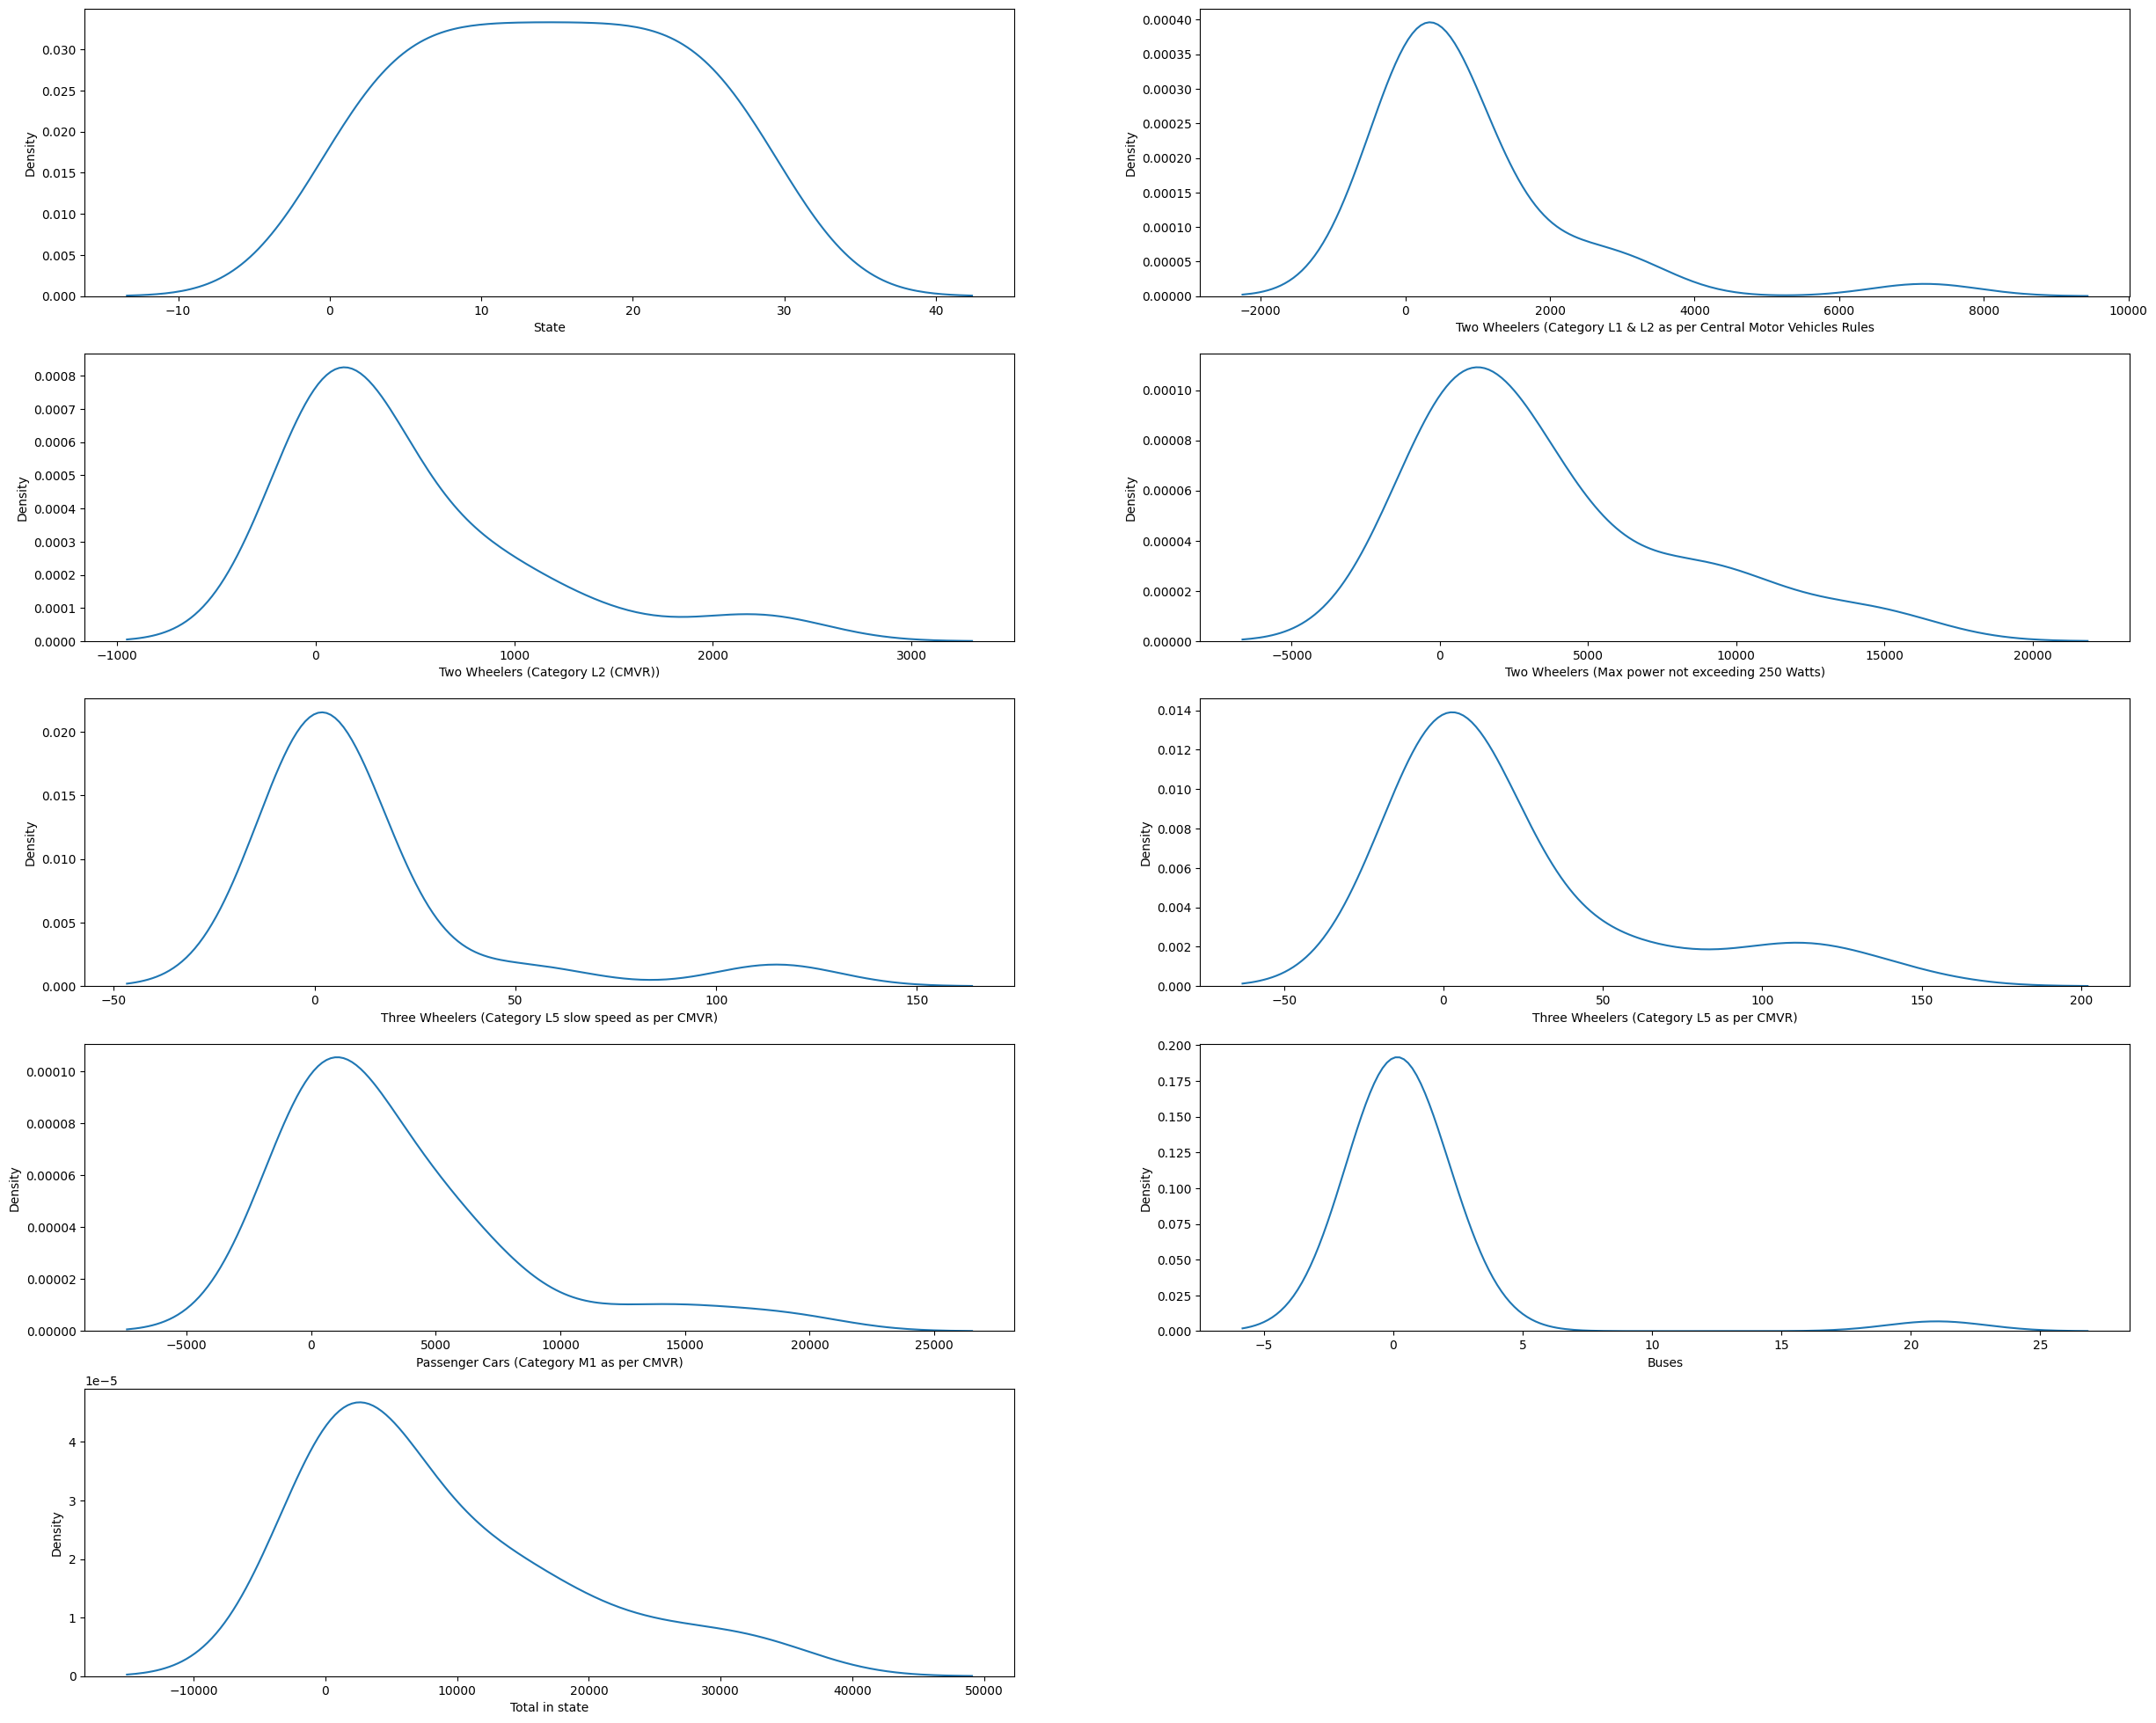

In [9]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

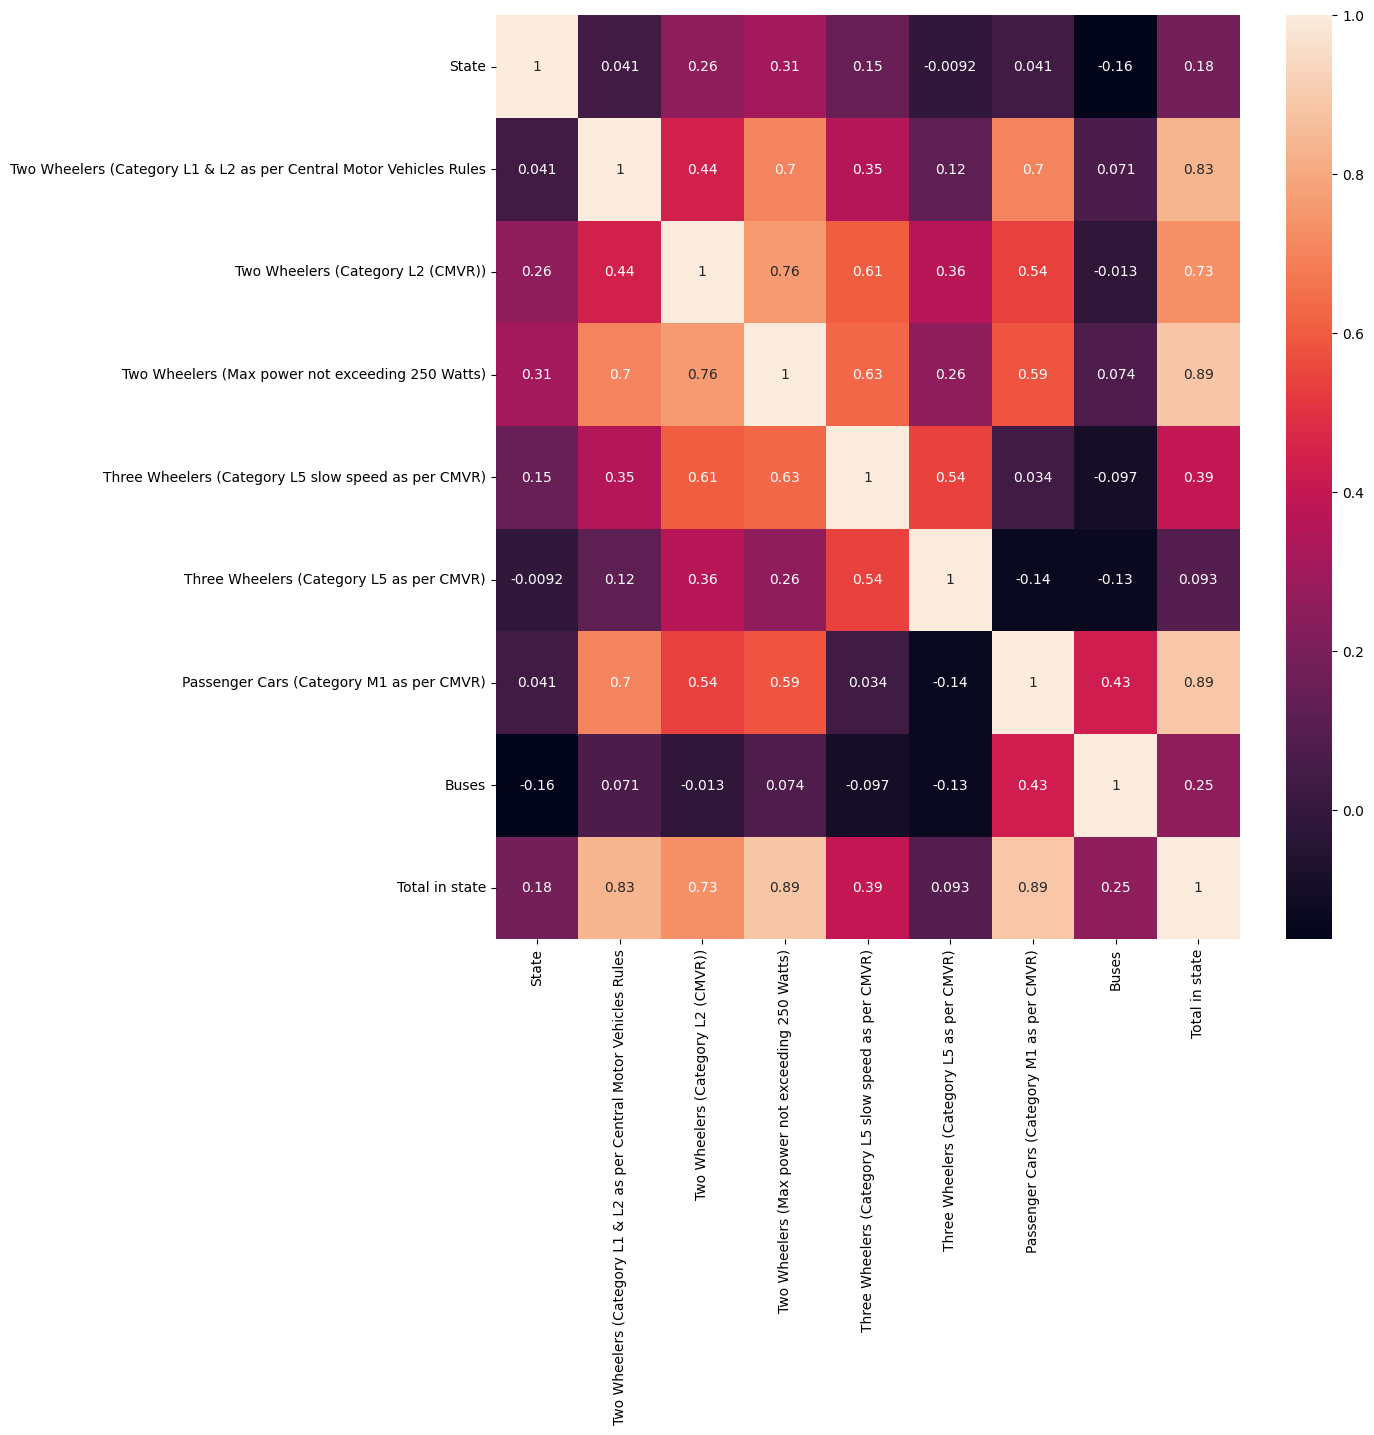

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [11]:
scaled_df = scalar.fit_transform(df)

In [14]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3"])
pca_df

,PCA1,PCA2,PCA3
0,-1.799697,0.069203,0.732822
1,-1.772068,0.097224,0.825277
2,-1.783213,0.109426,0.587048
3,-1.682749,0.221564,1.372560
4,-2.050735,-0.355118,-1.001623
5,-1.897886,-0.116010,0.002930
6,-1.793017,-0.085031,0.102681
7,-1.865331,-0.349816,-0.361415
8,-1.875550,-0.302924,-0.448835
9,-1.392767,0.145901,0.080562


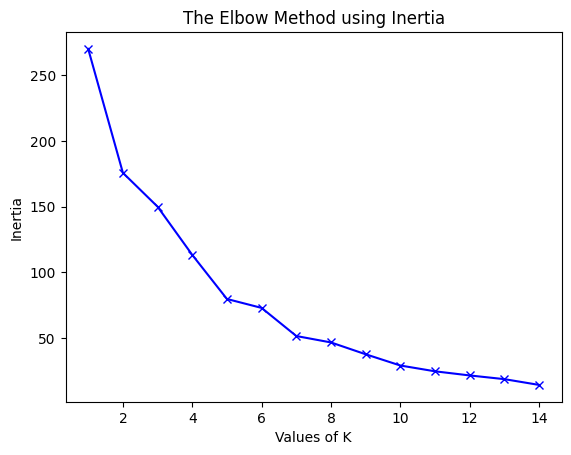

In [15]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [16]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

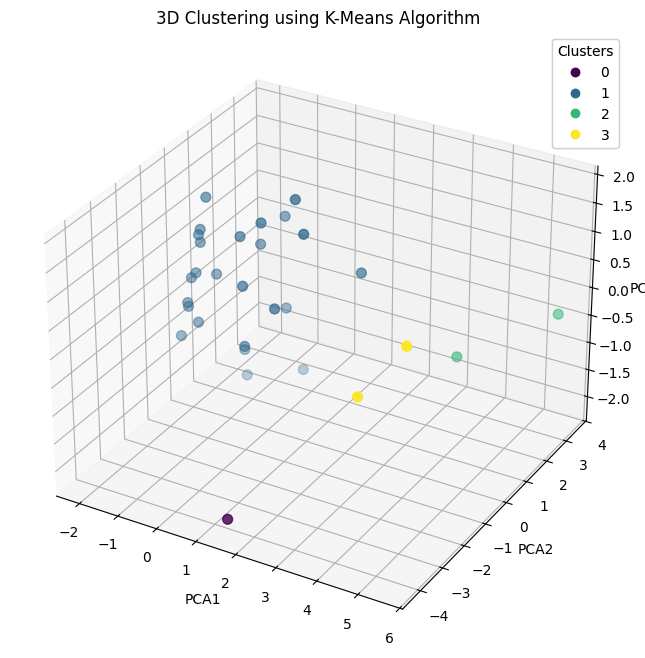

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df_kmeans['PCA1'], pca_df_kmeans['PCA2'], pca_df_kmeans['PCA3'], c=pca_df_kmeans['cluster'], cmap='viridis', s=50)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title("3D Clustering using K-Means Algorithm")
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [18]:
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,7.0,1395.00,251.0,5018.00,0.00,1.00,12695.00,21.00,19381.00
1,14.6,409.04,305.8,2391.64,6.12,21.96,1921.44,0.16,5056.16
2,18.5,3058.00,1929.5,14553.50,115.00,81.50,5161.50,0.00,24899.00
3,13.0,4906.00,1157.0,9311.00,3.00,3.50,17258.50,1.00,32640.00


In [19]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
0,19,0,0,0,0,0,6,0,6,1
1,20,0,20,3,0,0,1,0,24,1
2,18,16,8,11,0,5,12,0,52,1
3,26,28,9,36,0,0,8,0,81,1
4,0,0,0,0,0,0,82,0,82,1
5,11,0,0,0,0,0,98,0,98,1
6,12,2,76,152,0,0,208,0,438,1
7,8,0,0,0,0,0,513,1,514,1
8,6,4,0,9,0,0,803,0,816,1
9,13,75,228,736,9,7,655,0,1710,1


In [20]:
cluster_0_df = cluster_df[cluster_df["Cluster"]==0]
cluster_0_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
25,7,1395,251,5018,0,1,12695,21,19381,0


In [21]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==1]
cluster_1_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
0,19,0,0,0,0,0,6,0,6,1
1,20,0,20,3,0,0,1,0,24,1
2,18,16,8,11,0,5,12,0,52,1
3,26,28,9,36,0,0,8,0,81,1
4,0,0,0,0,0,0,82,0,82,1
5,11,0,0,0,0,0,98,0,98,1
6,12,2,76,152,0,0,208,0,438,1
7,8,0,0,0,0,0,513,1,514,1
8,6,4,0,9,0,0,803,0,816,1
9,13,75,228,736,9,7,655,0,1710,1


In [22]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==2]
cluster_2_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
26,10,3162,1504,13908,113,24,4878,0,23589,2
27,27,2954,2355,15199,117,139,5445,0,26209,2


In [23]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==3]
cluster_3_df

,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Cluster
28,9,7182,217,8476,0,4,15388,0,31267,3
29,17,2630,2097,10146,6,3,19129,2,34013,3


<Axes: xlabel='Cluster', ylabel='count'>

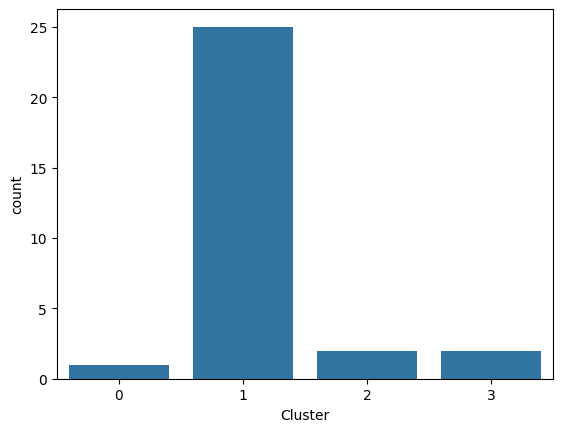

In [24]:
sns.countplot(x='Cluster', data=cluster_df)

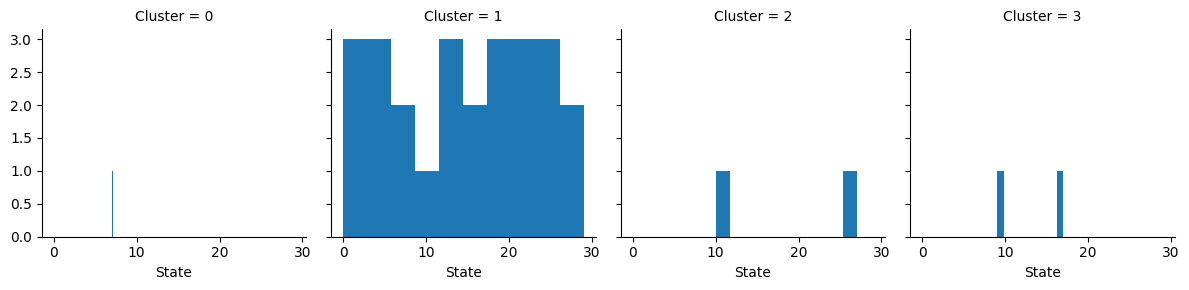

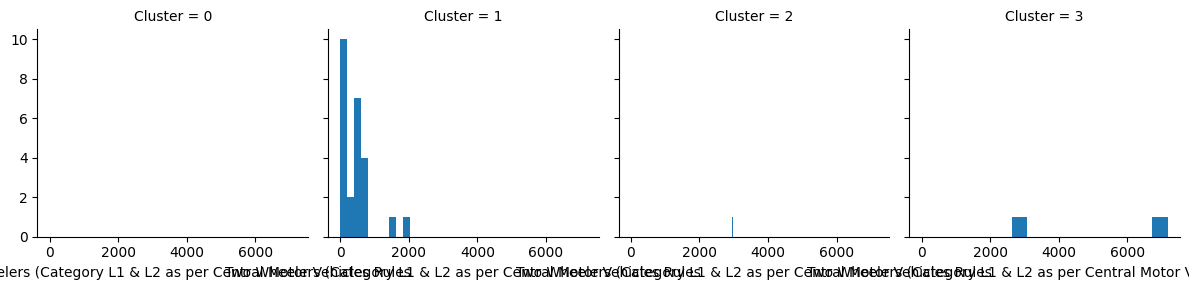

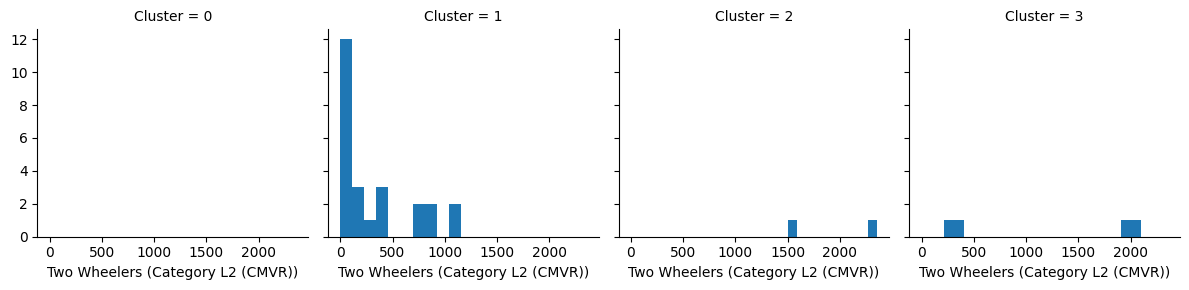

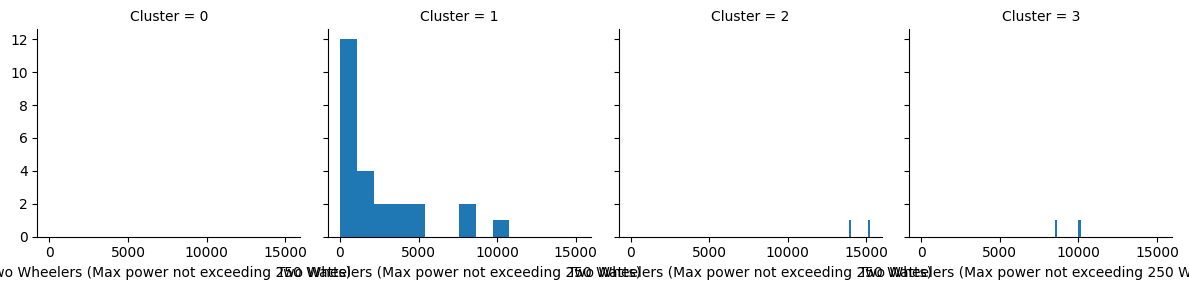

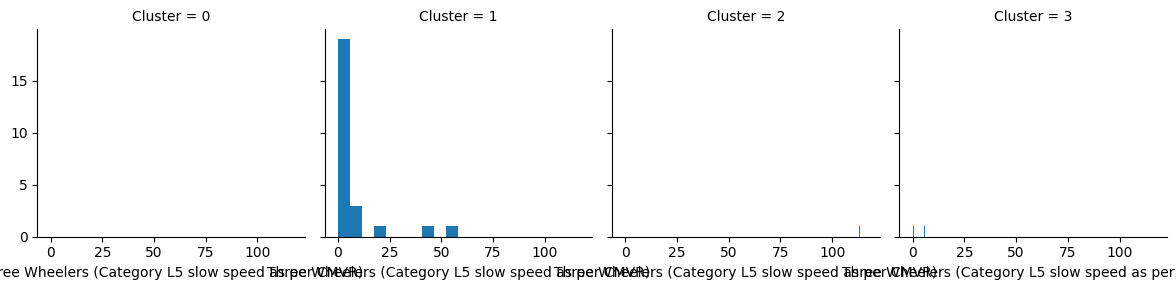

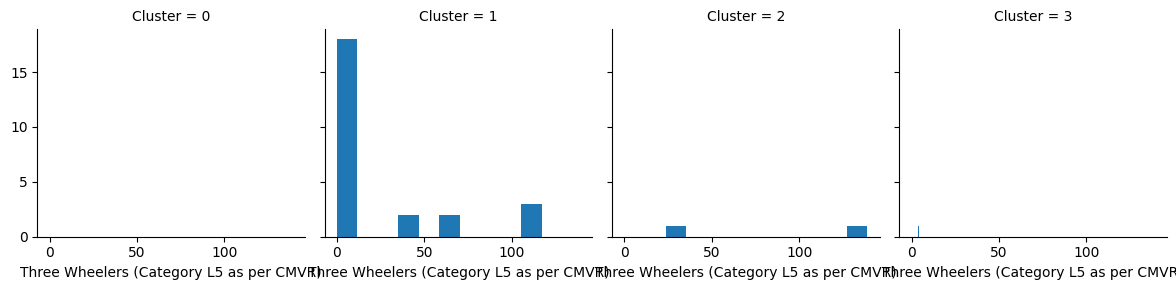

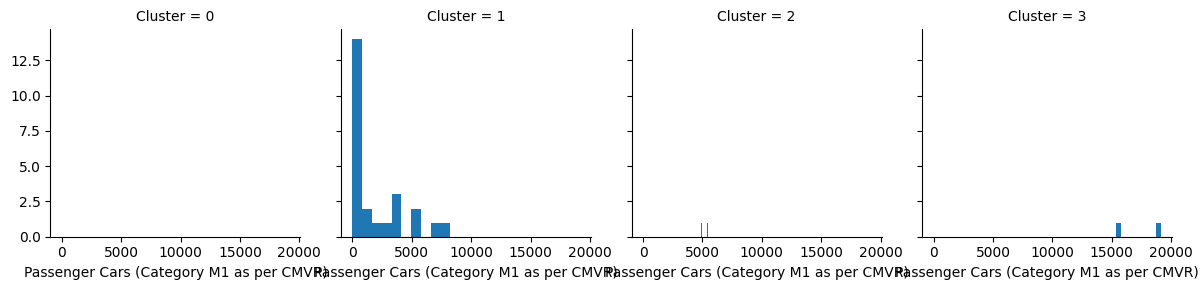

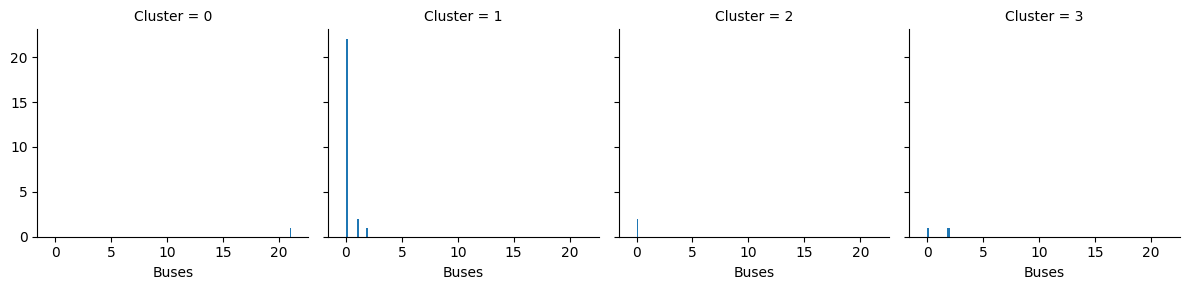

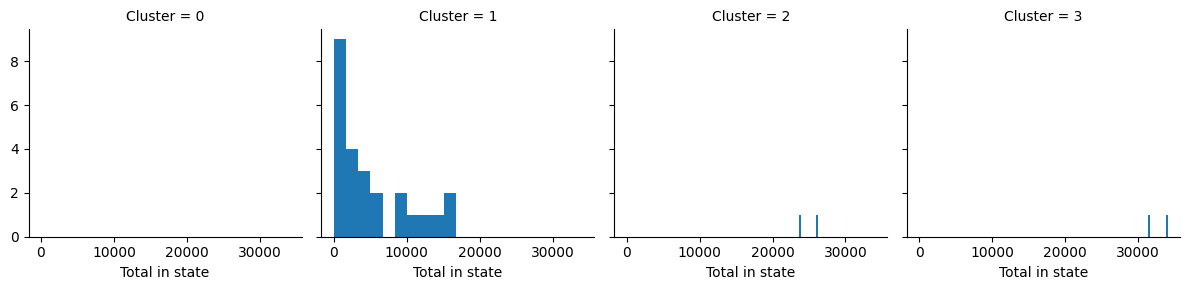

In [25]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

In [26]:
for column in cluster_df.select_dtypes(include=['int64']).columns:
    if column in original_labels:
        le = LabelEncoder()
        le.classes_ = original_labels[column]  
        cluster_df[column] = le.inverse_transform(cluster_df[column])


In [27]:
import joblib
joblib.dump(kmeans_model, "kmeans_model1.pkl")

['kmeans_model1.pkl']

In [28]:
cluster_df.to_csv("Clustered_Customer_Data_charging_station.csv")

In [29]:
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [30]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1]
 [0 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.89      1.00      0.94         8

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9



C:\Users\rajar\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajar\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\rajar\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
import pickle
from sklearn.metrics import accuracy_score
filename = 'final_model1.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X_test)
print(result)
print(accuracy_score(y_test,y_pred),'% Accuracy')

[1 1 1 1 1 1 1 1 1]
0.8888888888888888 % Accuracy
